## Lab3

In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## 1. Highlighting in a bar chart
Modify the following code by highlighting the bar of Label1 with a different color

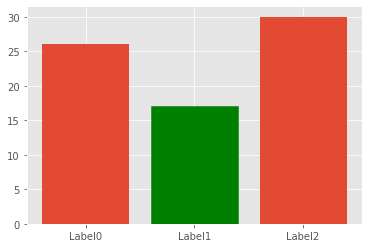

In [8]:
D = {u'Label0':26, u'Label1': 17, u'Label2':30}
bar_list = plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys());
bar_list[1].set_color('green') 


## 2. Highlighting in a pie chart
Modify the following code by highlighting pie B with a different color

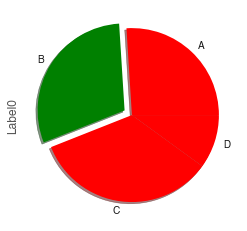

In [77]:
df = pd.DataFrame({'Label0':[26, 30, 34, 10], 'Name':['A', 'B', 'C', 'D']}, columns=['Label0', 'Name'])
explode = (0, 0.1, 0, 0)
colors = ['red', 'green', 'red', 'red']
df.Label0.plot(kind='pie', explode=explode, labels=df.Name, shadow=True, colors=colors);   #Hint, consider adding colors and explode parameters

#Ref: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

## 3. Highlighting in a scatter plot
Modify the following code by highlighting point (1.4,2.3) - index=2  with a different color

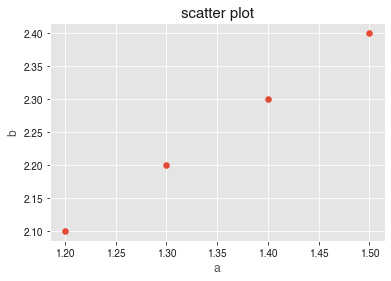

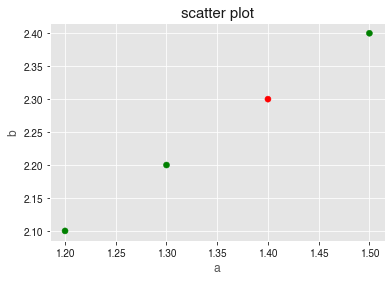

In [79]:
fig, ax = plt.subplots()
a = [1.2, 1.3, 1.4, 1.5]
b = [2.1, 2.2, 2.3, 2.4]

# Add data: "a" on x-axis, "b" on y-axis on scatter plot
plt.scatter(a,b)
# Set the x-axis label to "a"
plt.xlabel("a")
# Set the y-axis label to "b"
plt.ylabel("b")
# Set the title to "scatter plot"
plt.title("scatter plot", fontsize = 15) 
plt.show()

fig, ax = plt.subplots()
#create a colors vector with two colours "red" and "green"
colors = ['red', 'green']

#create color_indices for desire output, hint: color indices should be same length with a and b vector
color_indices = [1,1,0,1]

#create a color map with using colors
colormap = matplotlib.colors.ListedColormap(colors)

#create a scatter plot for highlight index=2 in a different color
ax.scatter(a, b, c=color_indices, cmap=colormap)

#set same labels from the previous plot
# ax.scatter(a,b)
# Set the x-axis label to "a"
plt.xlabel("a")
# Set the y-axis label to "b"
plt.ylabel("b")
# Set the title to "scatter plot"
plt.title("scatter plot", fontsize = 15) 
plt.show()


# 4. Interactive highlighting
We will create a code that enables highlighting graphically a unique catgory in the Iris dataset

In [27]:
#if after running this cell you get an error that ipywidget does not exist, 
#then uncomment the following line and run the cell again
# !pip install ipywidgets
from sklearn import datasets
from ipywidgets import interact

In [28]:
#Loading the iris dataset into a dataframe
#You do not need to change anything
iris = datasets.load_iris()
target_names = iris['target_names']
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris['target'] =  [target_names[int(x)] for x in iris['target']]
display(df_iris.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


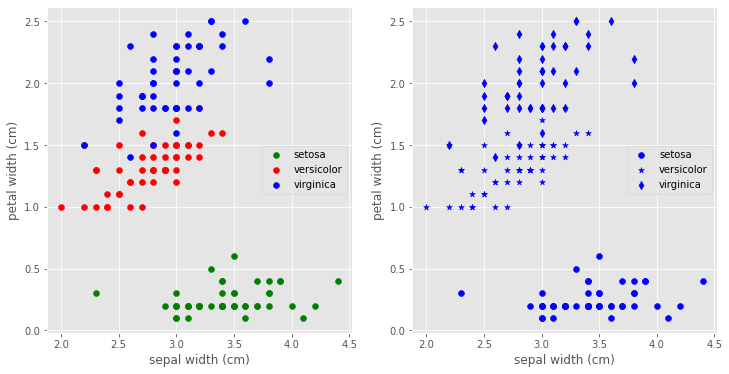

In [29]:
#Showing categories with different markers and colors. Which scatter plot provides more clarity?
#You do not need to change anything
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax1 = plt.subplot(121);
colors = {'versicolor':'r', 'setosa':'g', 'virginica':'b'}
for category in target_names:
    plt.scatter(df_iris['sepal width (cm)'][df_iris['target'] == category], 
                df_iris['petal width (cm)'][df_iris['target'] == category], c=colors[category], label=category)
ax1.legend(loc='right');
ax1.set_xlabel('sepal width (cm)')
ax1.set_ylabel('petal width (cm)')

ax2 = plt.subplot(122)
markers = {'versicolor':'*', 'setosa':'o', 'virginica':'d'}
for category in target_names:
    plt.scatter(df_iris['sepal width (cm)'][df_iris['target'] == category], 
                df_iris['petal width (cm)'][df_iris['target'] == category], c='b', marker=markers[category], label=category)
ax2.legend(loc='right');
ax2.set_xlabel('sepal width (cm)');
ax2.set_ylabel('petal width (cm)');
    

In [59]:
#Complete the following function that highlights the category passed as parameter
def plot_highlight(category):
    colors = np.where(df_iris['target'] == category, 'red', 'grey') 
    plt.scatter(df_iris['sepal width (cm)'], df_iris['petal width (cm)'], c=colors)   

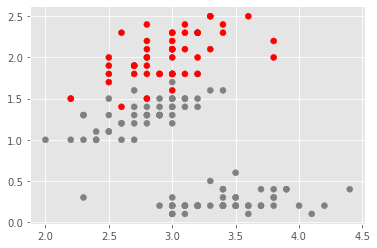

In [60]:
#this should be the result you get for virginica
plot_highlight('virginica') 

## 5. Creating a Bar Chart Race (Bonus Question)
Modify the following code in the link below and create your own bar chart race

https://pypi.org/project/bar-chart-race/#description



In [101]:
# brew install ffmpeg
import bar_chart_race as bcr
df = bcr.load_dataset('covid19_tutorial')
bcr.bar_chart_race(
    df=df,
    filename=None, #'covid19_horiz.mp4'
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=True,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .45, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .38,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='paired', #dark12
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  


/Users/kate/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Users/kate/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
